# NextSong - Smart Music Recommender  System

Team: <br>
Michal Moryosef, Abel Asfaw, Dor Ulman, Tenzin Sherpa 

## Problem Statement


The goal of this project is to study how music affects heart rate variability and see how audio features affect our heart rate speed. This has both entertainment and health benefit.  
In the development of the product, NextSong used:
1. "CooSpo Heart Rate Monitor" to monitor heart rate.<sup>1</sup> 
2. Pulsoid - heart rate widget for live streams used to broadcast user's live heart rate to NextSong server and feed it later to the model.<sup>2</sup>
3. Spotify API for all music analysis <sup>3</sup>
4. "musicnn"- an open source, deep learning-based music tagger, used as NextSong tansfer model <sup>4</sup>

<sup>1</sup> https://www.amazon.com/gp/product/B07R8741CN/ref=ppx_yo_dt_b_search_asin_title?ie=UTF8&psc=1 <br>
<sup>2</sup> https://pulsoid.net/ <br>
<sup>3</sup> https://developer.spotify.com/console/ <br>
<sup>4</sup> https://github.com/jordipons/musicnn, https://towardsdatascience.com/musicnn-5d1a5883989b


### Health benefits:
NextSong can help cardiologists can use the history to assess a user's average heart rate on a specific period and how frequently it drops below the “resting” 60 to 100 zone. This can help doctors map if a user has abnormal heart beats<sup>1</sup>

Moreover, NextSong contributes to the ongoing research field of how music can affect the brain activity by arising emotions, which lead to changes in the heart rate.

"There is no other stimulus on earth that simultaneously engages our brains as widely as music does," says Brian Harris, certified neurologic music therapist at Harvard-affiliated Spaulding Rehabilitation Hospital. This global activation happens whether you listen to music, play an instrument, or sing — even informally in the car or the shower, he says. And it helps to explain how and why music therapy works (see "Singing — and striding — stroke survivors"). <sup>2</sup>



<sup>1</sup>https://academic.oup.com/eurheartj/article/36/44/3043/2293535  <br>
<sup>2</sup>https://www.health.harvard.edu/heart-health/tuning-in-how-music-may-affect-your-heart

### Entertainment benefits:

NextSong can help streaming companies better customize their playlist according to the user's mood. If a user is running, the heart rate will increase. The app can create playlist with music that simulate similar heart rate. The user can user their heart data for each exercise zone and customize a playlist based their own natural tempo. 


<sup>3</sup>“Spotify to tailor music to your heart beat” <br> https://www.theguardian.com/technology/2014/jan/20/spotify-sensors-heart-rate-mood-playlists-motion-tracking <br>
<sup>4</sup>“Music Boosts Heart Health” <br>  https://www.cardiosmart.org/news/2015/10/music-boosts-heart-health <br>
<sup>5</sup>“Groove is in the Heart: Matching Beats Per Minute to Heart Rate, by Spotify” <br> https://medium.com/@Spotify/groove-is-in-the-heart-matching-beats-per-minute-to-heart-rate-271a79b7f96a

## Feature Engineering "Next Song" Dataset - The Process

A crucial part in the making of NextSong system, the team has featured engineered a dataset comprised of nearly 1500 songs.
Each song was split to four intervals, for each interval, a heart rate was recorded- using a heart rate monitor passed through all team members. <br>
The recorded heart rate for each interval, is the average of the heart rate of all team members.

We used Spotify API to extract further research analysis such as: tempo, acousticness, danceability, energy etc. which will be used to match the user's song pick to the features in the trained dataset.


Later, using transfer learning (musiccnn model which will be discussed later in this notebook) we extracted for each song audio-tags, to gain more accurate analysis of the song features. <br>
The importance of using the transferred learning model here is to create a better model training when predicting the heart rate:
Once the user searches for a song, the pre-trained model runs in the back, getting "audio-tags" such as "blues", "energy", "loud" and comparing these tags to the features values in the dataset to eventually, get the most accurate value of the heart rate.  


## Exploratory Data Analysis
Provide a brief exploratory data analysis with 3-5
visualizations that help illustrate the data that is going into your model, the distribution
of your target variable, and that help explain how you assembled your dataset. Explain
the purpose of any transformations performed on your input data.

In [77]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import plotly
%matplotlib inline
filename ="C:\\Users\\abelf\\Downloads\\music_recommender\\dataset\\final_heart_rate_data.xlsx".strip("\u202a")
data_frame = pd.read_excel(filename)
data_frame.head()

song  interval 1 -HR  interval 2-HR  \
0                  Megan Hilty - Be a Man.mp3              82             76   
1           State Of Grace (Taylor's Version)              88             80   
2                      Red (Taylor's Version)              79             88   
3              Treacherous (Taylor's Version)              90             77   
4  I Knew You Were Trouble (Taylor's Version)              71             81   

   interval 3-HR  interval 4-HR    tempo  acousticness  danceability  energy  \
0             77             89   73.808      0.848000         0.462   0.255   
1             72             85  129.958      0.000328         0.594   0.713   
2             71             90  125.047      0.001080         0.516   0.777   
3             75             88  109.984      0.034400         0.645   0.593   
4             86             79  154.008      0.012900         0.584   0.557   

   instrumentalness  liveness  loudness  speechiness  valence  Avg - HR  
0          0.000002    0.1240    -7.169       0.0373    0.251     81.00  
1          0.000000    0.1140    -5.314       0.0503    0.328     81.25  
2          0.000002    0.0761    -4.908       0.0375    0.408     82.00  
3          0.000127    0.1300    -6.506       0.0288    0.299     82.50  
4          0.000000    0.0576    -6.371       0.0342    0.767     79.25

### Going Deeper Into The Dataset: 
- Heart rate data was collected using pulsoid monitor:https://pulsoid.net/ 
- most collection was done sitting( average heart rate - 75 bpm) 
- audio features were collected from spotify API. https://spotipy.readthedocs.io/en/2.19.0// More on that later. 

In [55]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song              1480 non-null   object 
 1   interval 1 -HR    1480 non-null   int64  
 2   interval 2-HR     1480 non-null   int64  
 3   interval 3-HR     1480 non-null   int64  
 4   interval 4-HR     1480 non-null   int64  
 5   tempo             1480 non-null   float64
 6   acousticness      1480 non-null   float64
 7   danceability      1480 non-null   float64
 8   energy            1480 non-null   float64
 9   instrumentalness  1480 non-null   float64
 10  liveness          1480 non-null   float64
 11  loudness          1480 non-null   float64
 12  speechiness       1480 non-null   float64
 13  valence           1480 non-null   float64
 14  Avg - HR          1480 non-null   float64
dtypes: float64(10), int64(4), object(1)
memory usage: 173.6+ KB


### Analysis Of Tempo In The Dataset 

<AxesSubplot:ylabel='Frequency'>

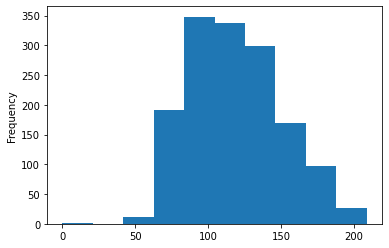

In [56]:
data_frame.tempo.plot(kind='hist')


MAJORITY OF THE TEMPO FALLS BETWEEN 100 - 150.  
A 2002 study found that people have a “preferred tempo” in this same 120 to 130 bpm range, which aligns roughly with average walking speed and even the tempo of crowd applause:
LINK TO THE STUDY: 

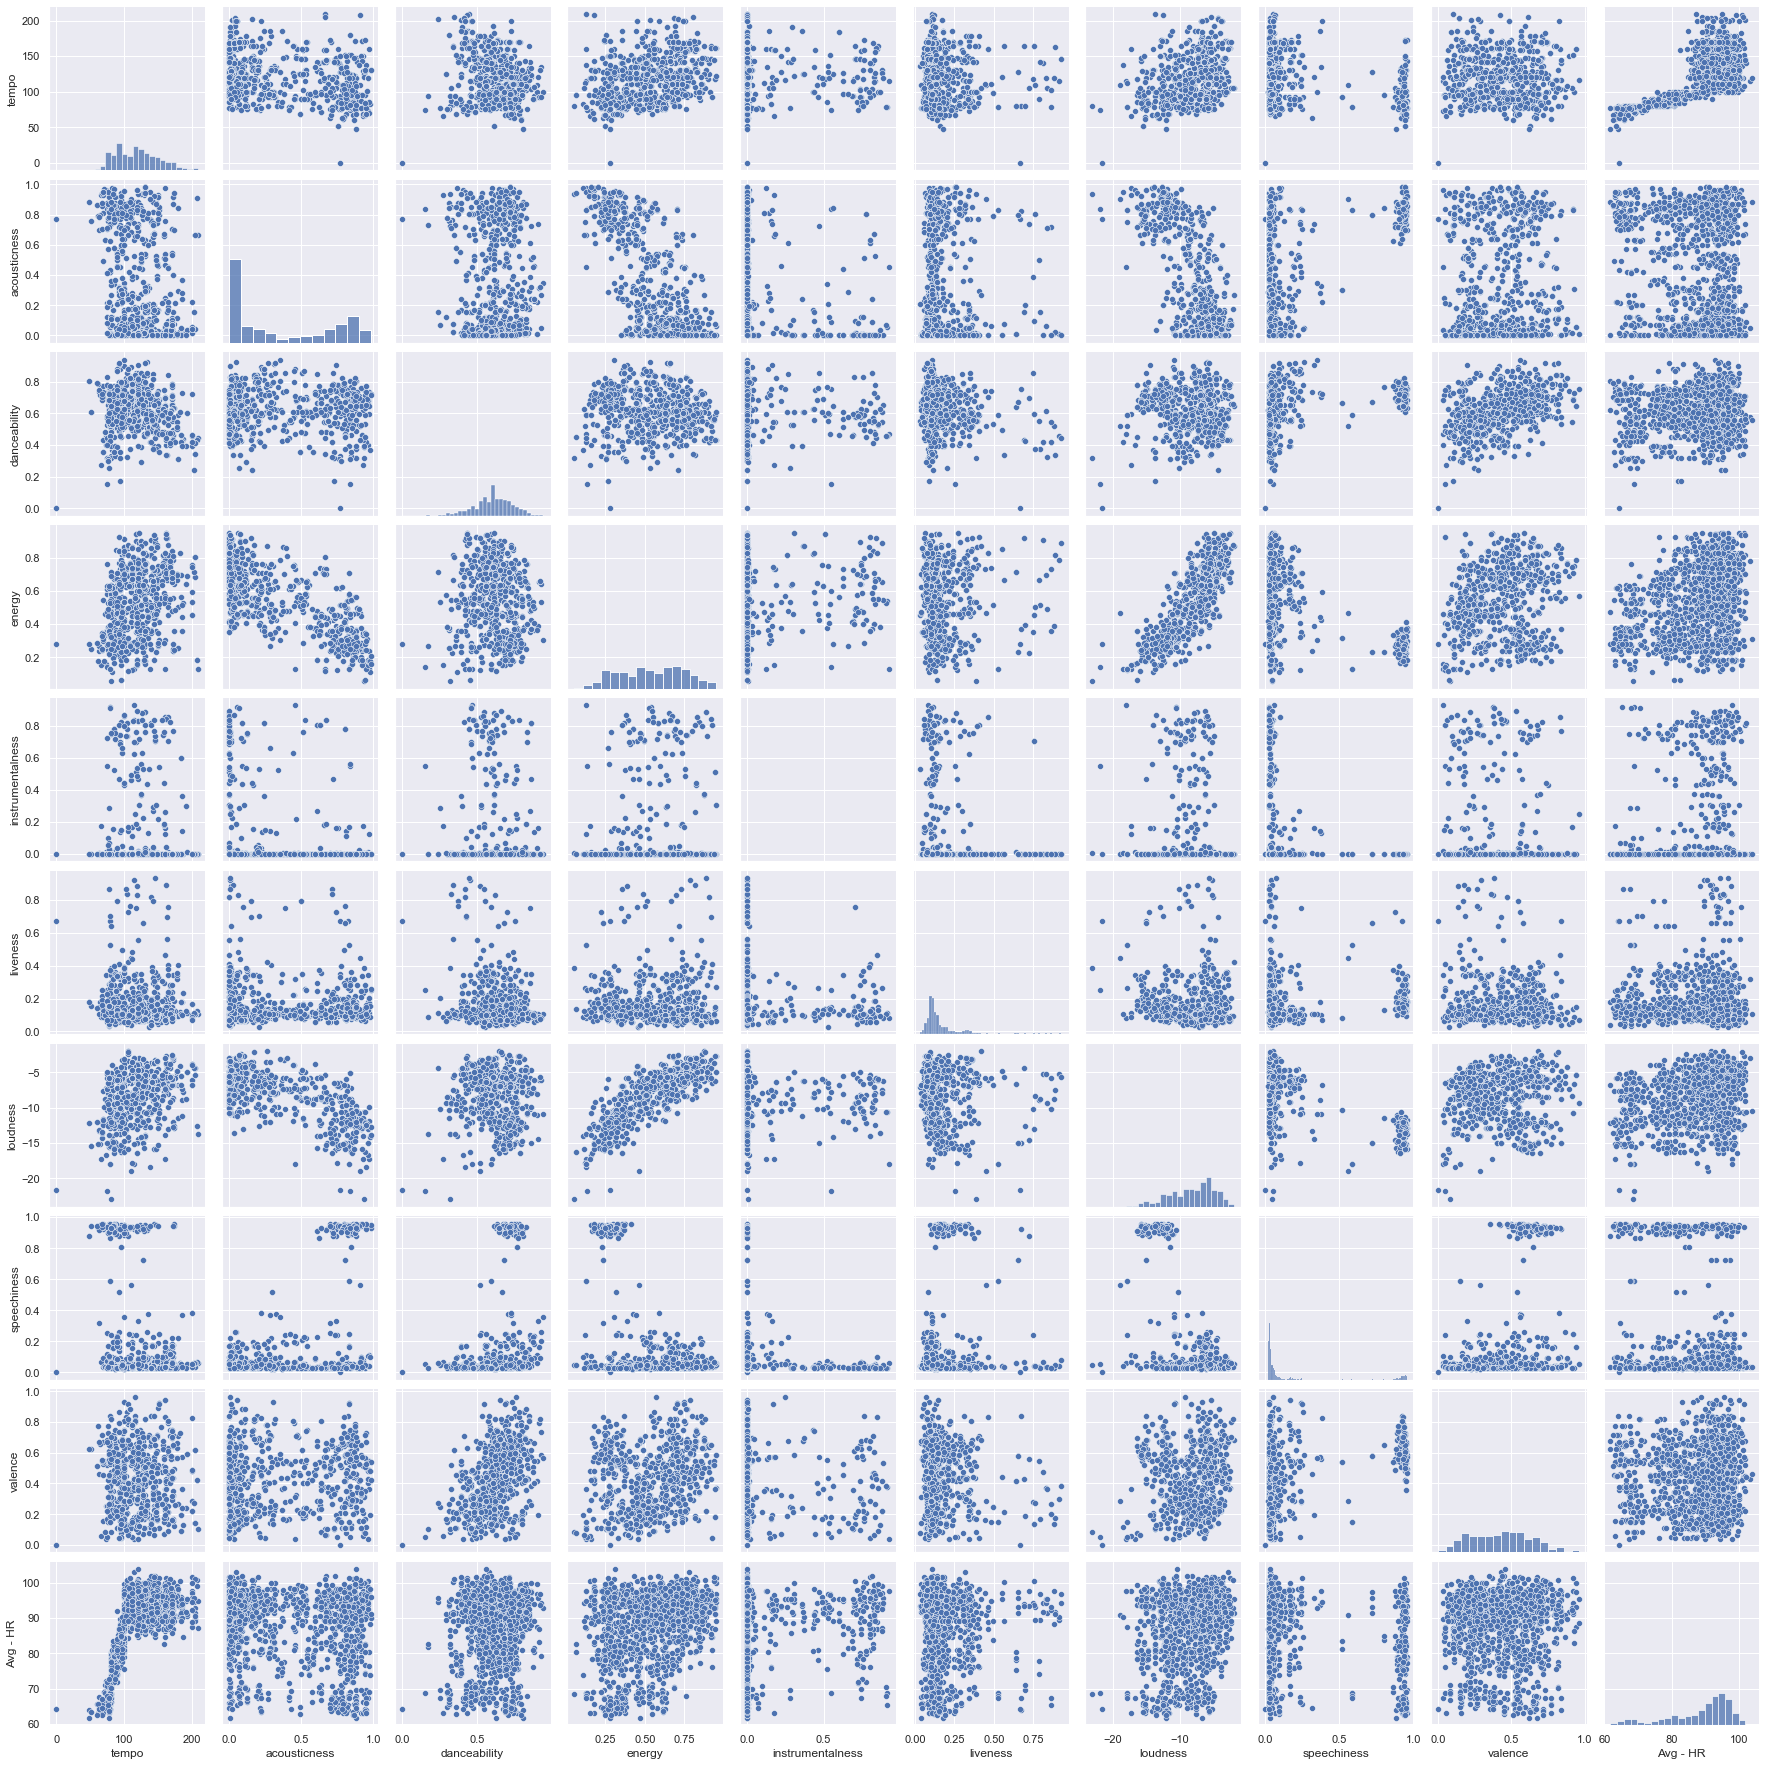

In [103]:
import seaborn as sns
sns.set(font_scale=1) 
sns.pairplot(data_frame.drop(["interval 1 -HR", "interval 2-HR", "interval 3-HR", "interval 4-HR"], axis = 1))

### Direct Correlation Between Features 
- tempo/ Avg HR 
- energy/ loudness 
- danceability/ valence

We can start by analyzing some of our feature and their relathionships. Create a scatterplot based on the songs' valence and danceability values. Then use linear regression to find their correlation.
Define the features:
- DANCEABILITY : how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. 0.0 is least danceable and 1.0 is most danceable.
- ACOUSTICNESS : A measure from 0.0 to 1.0 of whether the track is acoustic.
- ENERGY: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.
- INSTRUMENTALNESS: Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- LIVENESS: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
- LOUDNESS: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track. Values typical range between -60 and 0 db.
- SPEECHINESS: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.
- TEMPO: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- VALENCE: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

In [106]:
corr = data_frame.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

## Tansfer Learning Model- Musicnn 

### Background:

The musicnn library (pronounced as “musician”) employs deep convolutional neural networks to automatically tag songs, and the models that are included achieve the best scores in public evaluation benchmarks. These state-of-the-art models have been released as an open-source library that can be easily installed and used. <br>
This project has been developed by a music and audio research laboratory in Barcelona<sup>1</sup>, and is the result of several years of research. This research institution, the Music Technology Group of the Universitat Pompeu Fabra, is well known for its research on music and audio technologies. For example: they contributed to pioneering singing voice synthesis engines like Vocaloid, or they maintain open-source projects like Freesound.

<sup>1</sup> Music Technology Group - (MTG) of the Universitat Pompeu Fabra in Barcelona, part of its Department of Information and Communication Technologies, carries out research on topics such as audio signal processing, music information retrieval, musical interfaces, and computational musicology. https://www.upf.edu/web/mtg/

### visualizing audio
LETS VISUALIZE A SAMPLE AUDIO: THIS WILL HELP US UNDERSTAND HOW OUR PRETRAINED MODEL PROCESS AN AUDIO INPUT. 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import librosa
audio_path = r'C:\Users\abelf\Downloads\music_recommender\musicnn\audio\joram-moments_of_clarity-08-solipsism-59-88.mp3'
x , sr = librosa.load(audio_path)import warnings


In [11]:
#playing audio
import IPython.display as ipd
ipd.Audio(audio_path)

plotting audio array

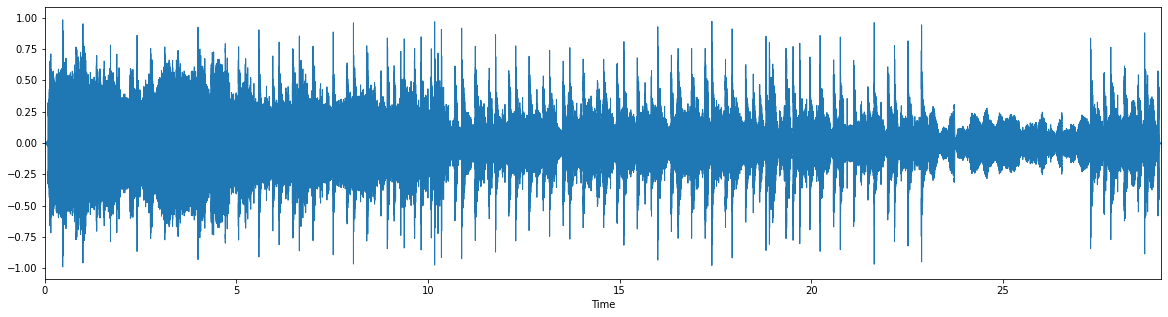

In [12]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(20, 5))
librosa.display.waveplot(x, sr=sr)

 SPECTROGRAM: A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. When applied to an audio signal, spectrograms are sometimes called sonographs, voiceprints, or voicegrams.
 Spectograms are important in identyfing the frquencies which determine the tempo, meter and the beat of the music.

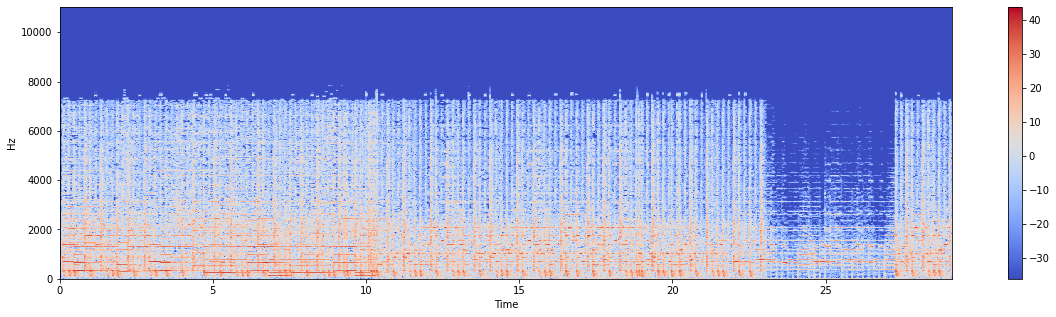

In [13]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

amplitude represents the loudness of a music

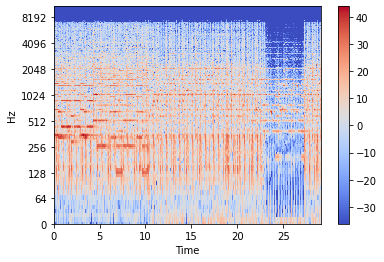

In [15]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

Some other features worth mentioning
 - zero cross rate:rate at which a signal changes from positive to zero to negative or from negative to zero to positive. ... Zero crossing rates are also used for Voice activity detection (VAD), which determines whether human speech is present in an audio segment
 - Spectral rolloff is the frequency that indicates the energy of the music

Zero crossing rate (500,)


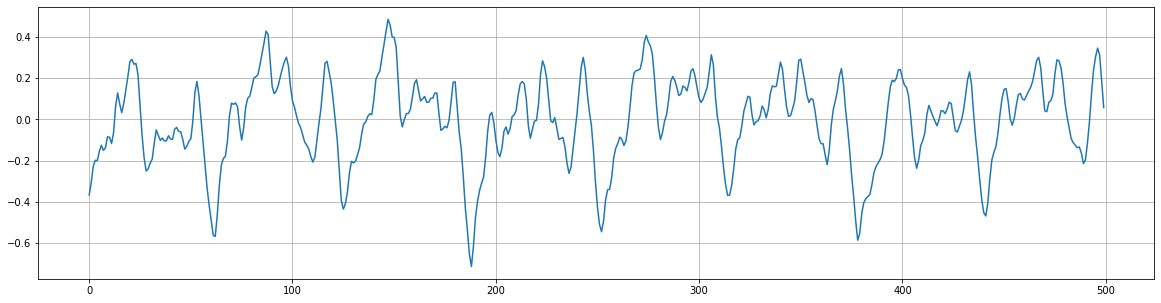

In [18]:
# Zooming in
n0 = 3000
n1 = 3500
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print("Zero crossing rate:" ,zero_crossings.shape)

spectrial centroids: (1255,)


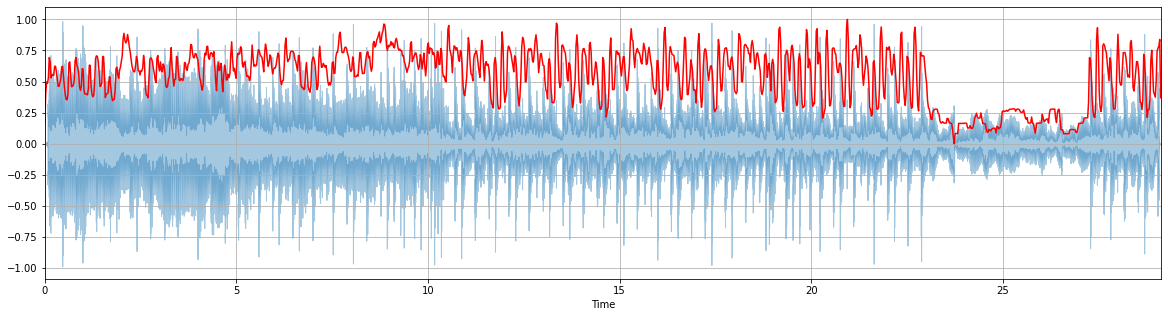

In [26]:
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
plt.figure(figsize=(20,5))
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, sklearn.preprocessing.minmax_scale(spectral_rolloff, axis=0), color='r')
plt.grid()
print("spectrial centroids:", spectral_centroids.shape)

## Modeling & Spotify Music Analytics

### calculate features, split dataset and use linear regression and random forest regressor. 
Since the goal is to determine a value(HR), this is a regression problem.

In [ ]:
data_frame =  data_frame.drop(["interval 1 -HR", "interval 2-HR", "interval 3-HR", "interval 4-HR","song"], axis = 1)
#data_frame=(data_frame-data_frame.min())/(data_frame.max()-data_frame.min())
X = data_frame.drop(["Avg - HR"], axis = 1)
y = data_frame["Avg - HR"]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.3)

### CALCULATE THE IMPORTANCE OF THE FEATURES IN THE HEART RATE COLLECTION

In [88]:
# Analyze feature importances
from sklearn.ensemble import RandomForestRegressor

#X_train = data_frame[['acousticness','danceability','energy','tempo','instrumentalness','liveness','loudness','speechiness','valence']]
#y_train = data_frame['Avg - HR']
forest = RandomForestRegressor(random_state=42, max_depth=5, max_features=9) # Set by GridSearchCV below
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
print(importances)

# Print the feature rankings
print("Feature ranking using random forest:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X_train.columns[f], 
            importances[indices[f]]))

[0.1299459  0.11201894 0.11050724 0.10403315 0.05176899 0.11277698
 0.10609716 0.19077071 0.08208093]
Feature ranking using random forest:
1. tempo 0.190771 
2. acousticness 0.129946 
3. danceability 0.112777 
4. energy 0.112019 
5. instrumentalness 0.110507 
6. liveness 0.106097 
7. loudness 0.104033 
8. speechiness 0.082081 
9. valence 0.051769 


as we can see tempo is predicted to have a greater effect(higher weight) on the heart rate compared to the other features. By definition tempo measure the speed of the audio's "heart beat". Acousticness and danceability come in second with 13.2%. 
In other words: 
- holding all others features fixed, 1 unit in tempo increase is associated with an increase of 0.19 in HR.
- holding all others features fixed, 1 unit in acousticness increase is associated with an increase of 0.13 in HR.
- holding all others features fixed, 1 unit in danceability increase is associated with an increase of 0.12 in HR.
- holding all others features fixed, 1 unit in energy increase is associated with an increase of 0.10 in HR.
- holding all others features fixed, 1 unit in instrumentalness increase is associated with anincrease of 0.10 in HR.
- holding all others features fixed, 1 unit in liveness increase is associated with an increase of 0.10 in HR.
- holding all others features fixed, 1 unit in loudness increase is associated with an increase of 0.09 in HR.
- holding all others features fixed, 1 unit in speechiness increase is associated with an increase of 0.08 in HR.
- holding all others features fixed, 1 unit in valence increase is associated with an increase of 0.07 in HR.

### Get the MSE to determine the loss of our model

In [48]:
from sklearn.metrics import mean_squared_error
predictions = forest.predict(X_test)
forest.fit(X_train , y_train)
mean_squared_error(predictions,y_test)

0.029916537462463016

### Lets try to tune our model to improve the weights 

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [50]:
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4],
   'criterion' :['mse', 'mae']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
print(importances)

# Print the feature rankings
print("Feature ranking using random forest:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X_train.columns[f], 
            importances[indices[f]]))

{'criterion': 'mse',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [51]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
print(importances)

# Print the feature rankings
print("Feature ranking using random forest:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X_train.columns[f], 
            importances[indices[f]]))

[0.13177342 0.11057516 0.11168095 0.10514766 0.05184666 0.11306812
 0.10509041 0.19070432 0.08011329]
Feature ranking using random forest:
1. tempo 0.190704 
2. acousticness 0.131773 
3. danceability 0.113068 
4. energy 0.111681 
5. instrumentalness 0.110575 
6. liveness 0.105148 
7. loudness 0.105090 
8. speechiness 0.080113 
9. valence 0.051847 


### Use a linear regression 

linear regression intercept:  81.10324163781517


Coefficient
tempo               -0.001154
acousticness        -0.457307
danceability         0.230137
energy              -1.851537
instrumentalness     0.248528
liveness             0.052918
loudness             0.032598
speechiness          0.032250
valence              0.670855

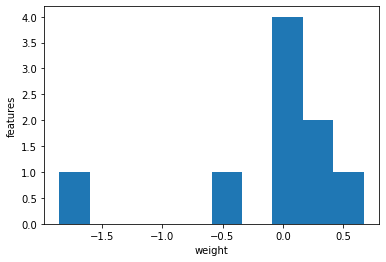

In [91]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print("linear regression intercept: ",lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

plt.hist(coeff_df)
plt.xlabel("weight")
plt.ylabel("features")
coeff_df


### get the error rate

In [72]:
from sklearn.metrics import mean_squared_error
#y_test = y_test.to_numpy().reshape(-1,1)
#X_test = X_test.to_numpy().reshape(-1,1)
y_pred = lm.predict(X_test)
print("Coefficients: ",lm.coef_)
print("Error rate: ",np.sqrt(mean_squared_error(y_pred,y_test))*100)

Coefficients:  [-0.01303068 -0.02429847  0.01168099 -0.08946428  0.01245327  0.00257983
  0.03712651  0.00166829  0.03499325]
Error rate:  17.00785639274138


### Test both models with a sample music data 

In [68]:
file_path = r"‪C:\Users\abelf\Downloads\songsdata.csv".strip("\u202a")
test_df = pd.read_csv(file_path)
test_df.columns

Index(['track_id', 'tempo', 'loudness', 'mode', 'artist_name', 'title'], dtype='object')

let's use spotify api to get some audio features by using the features given 

In [ ]:
tempo = 129.991
loudness = -6.105
speechiness = 0.0638
acousticness = 0.0436
instrumentalness = 0
energy = 0.815
valence = 0.28
danceability = 0.512
liveness = 0.149

In [89]:
print("Predicted HR using linear regression:",lm.predict([[tempo,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence]]))
print("Predicted HR using random forest:",forest.predict([[tempo,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence]]))

Predicted HR using linear regression: [79.54090614]
Predicted HR using random forest: [79.23181476]


We can see that linear regression and random forest predict the same value when taking the same audio features. The dataset has 1500 songs with audio features and heart rate collected through the Pulsoid Monitor. 
Pros and Cons: 
- pros: We noticed that there is a strong relathionship between the features and a lot of similarities fall within the 70-90 range. This is a normal range for sitting position.
- cons: they might overfit since the people who collected the dataset are in their 20s and the collection is dobe sitting

### MODELLING: PRETRAINED MODEL (TEMPOCNN FOR BPM PREDICTION AND MUSICNN FOR TAGS PREDICTION) 


### TEMPOCNN
- used to predict( pulse, tempo, meter..)
- takes audio as input 

link for pretrained model:  CNN-based framework for estimating temporal properties of music tracks featuring trained models. Here let's define two things:
- Pulse—“beat”: the background “heartbeat” of a piece of music.
- Tempo—“rate”: the relatively fast or slow speed at which we perceive the pulse in a piece of music.
This pretrained model has two classifiers: tempo and meter.
We are using the local tempo classifer to predict the HR because it determines: Which durational value is assigned to represent the fundamental background pulse. 
Pulse a recurring underlying pulsation that we perceive that compels music to progress through time. Pulse makes us react kinesthetically to music: in other words, it compels motion. We tap our feet, we dance, we march, or we may just “feel” the pulse internally.
the tempo of a musical piece is one of its main characteristics. Its estimation is often defined as measuring the frequency with which humans “tap” along to the
beat. This is notably different from beat tracking, which
aims at determining individual beat positions.
Tempo generally is measured as the number of beats per minute, where the beat is the basic measure of time in music. The heartbeat is a division of time, and it can be fast or slow—its tempo. Therefore we will use the local tempo classifier to determine the division of time.

In [115]:
from tempocnn.classifier import TempoClassifier
from tempocnn.feature import read_features

model_name = 'cnn'
input_file = r'C:\Users\abelf\Downloads\music_recommender\musicnn\audio\joram-moments_of_clarity-08-solipsism-59-88.wav'

# initialize the model (may be re-used for multiple files)
classifier = TempoClassifier(model_name)

# read the file's features, specify hop_length for temporal resolution
features = read_features(input_file, frames=256, hop_length=32)

# estimate local tempi, this returns tempo classes, i.e., a distribution
local_tempo_classes = classifier.estimate(features)

# find argmax per frame and convert class index to BPM value
max_predictions = np.argmax(local_tempo_classes, axis=1)
local_tempi = classifier.to_bpm(max_predictions)
print(f"Estimated HR : {local_tempi[-1]}")

Estimated HR : 85


### MUSICNN IN USE
- used for music tagging
 - the model takes in an audio as input 
 -predicts 3 sets of tags( can be modified)

In [117]:
from musicnn.tagger import top_tags
top_tags(r'C:\Users\abelf\Downloads\music_recommender\musicnn\audio\joram-moments_of_clarity-08-solipsism-59-88.wav', model='MTT_musicnn', topN=10)

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
[C:\Users\abelf\Downloads\music_recommender\musicnn\audio\joram-moments_of_clarity-08-solipsism-59-88.wav] Top10 tags: 
 - techno
 - electronic
 - synth
 - fast
 - beat
 - drums
 - no vocals
 - no vocal
 - dance
 - ambient


['techno',
 'electronic',
 'synth',
 'fast',
 'beat',
 'drums',
 'no vocals',
 'no vocal',
 'dance',
 'ambient']

Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!


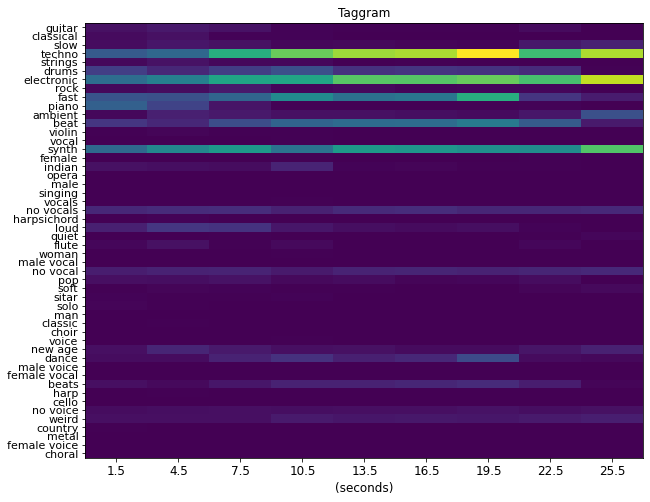

In [121]:
from musicnn.extractor import extractor
taggram, tags = extractor(r'C:\Users\abelf\Downloads\music_recommender\musicnn\audio\joram-moments_of_clarity-08-solipsism-59-88.wav', model='MTT_musicnn', extract_features=False)
fig, ax = plt.subplots()
in_length = 3 # seconds  by default, the model takes inputs of 3 seconds with no overlap

plt.rcParams["figure.figsize"] = (10,8) # set size of the figures
fontsize = 12 # set figures font size
# title
ax.title.set_text('Taggram')
ax.title.set_fontsize(fontsize)

# x-axis title
ax.set_xlabel('(seconds)', fontsize=fontsize)

# y-axis
y_pos = np.arange(len(tags))
ax.set_yticks(y_pos)
ax.set_yticklabels(tags, fontsize=fontsize-1)

# x-axis
x_pos = np.arange(taggram.shape[0])
x_label = np.arange(in_length/2, in_length*taggram.shape[0], 3)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_label, fontsize=fontsize)

# depict taggram
ax.imshow(taggram.T, interpolation=None, aspect="auto")
plt.show()

In [ ]:
from musicnn.extractor import extractor
taggram, tags = extractor(r'C:\Users\abelf\Downloads\music_recommender\musicnn\audio\joram-moments_of_clarity-08-solipsism-59-88.wav', model='MTT_musicnn', extract_features=False)
fig, ax = plt.subplots()
in_length = 3 # seconds  by default, the model takes inputs of 3 seconds with no overlap

plt.rcParams["figure.figsize"] = (10,8) # set size of the figures
fontsize = 12 # set figures font size
# title
ax.title.set_text('Taggram')
ax.title.set_fontsize(fontsize)

# x-axis title
ax.set_xlabel('(seconds)', fontsize=fontsize)

# y-axis
y_pos = np.arange(len(tags))
ax.set_yticks(y_pos)
ax.set_yticklabels(tags, fontsize=fontsize-1)

# x-axis
x_pos = np.arange(taggram.shape[0])
x_label = np.arange(in_length/2, in_length*taggram.shape[0], 3)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_label, fontsize=fontsize)

# depict taggram
ax.imshow(taggram.T, interpolation=None, aspect="auto")
plt.show()

### histogram of tags representation

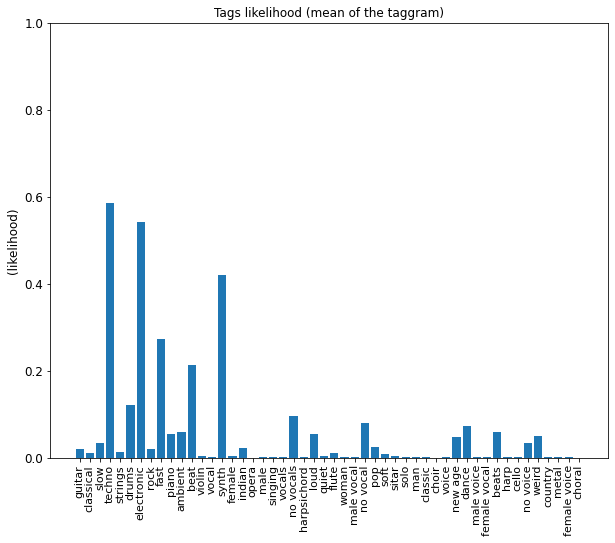

In [123]:
tags_likelihood_mean = np.mean(taggram, axis=0) # averaging the Taggram through time 
fig, ax = plt.subplots()

# title
ax.title.set_text('Tags likelihood (mean of the taggram)')
ax.title.set_fontsize(fontsize)

# y-axis title
ax.set_ylabel('(likelihood)', fontsize=fontsize)

# y-axis
ax.set_ylim((0, 1))
ax.tick_params(axis="y", labelsize=fontsize)

# x-axis
ax.tick_params(axis="x", labelsize=fontsize-1)
pos = np.arange(len(tags))
ax.set_xticks(pos)
ax.set_xticklabels(tags, rotation=90)

# depict song-level tags likelihood
ax.bar(pos, tags_likelihood_mean)
plt.show()

## Results

### Histogram Of Features Related 


#### Danceability/Valence

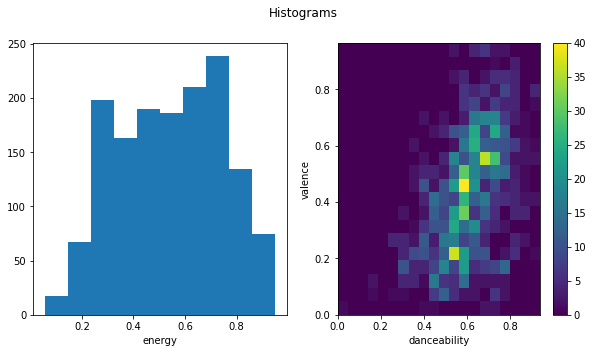

In [4]:
x = "danceability"
y = "valence"

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
fig.suptitle("Histograms")
h = ax2.hist2d(data_frame[x], data_frame[y], bins=20)
ax1.hist(data_frame["energy"])

ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("energy")

plt.colorbar(h[3], ax=ax2)

plt.show()

#### Energy/ Loudness

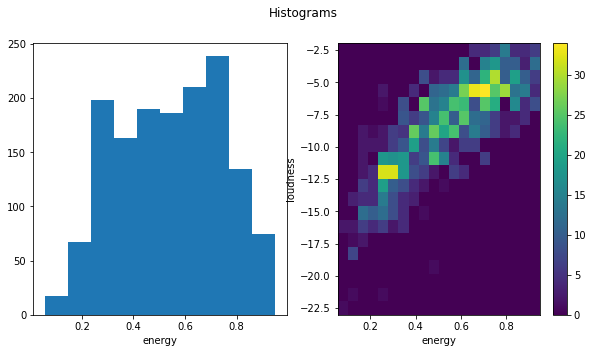

In [5]:
x = "energy"
y = "loudness"

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
fig.suptitle("Histograms")
h = ax2.hist2d(data_frame[x], data_frame[y], bins=20)
ax1.hist(data_frame["energy"])

ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("energy")

plt.colorbar(h[3], ax=ax2)

plt.show()

#### Tempo/ Average Heart Rate

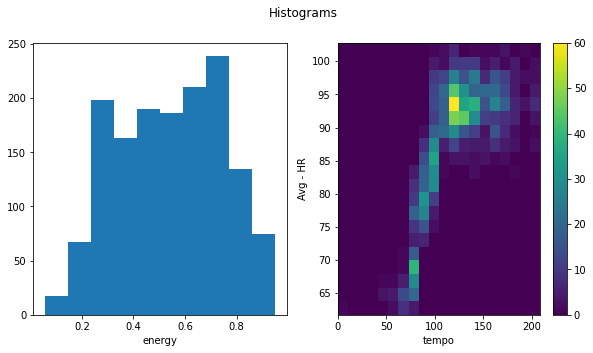

In [6]:
x = "tempo"
y = "Avg - HR"

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
fig.suptitle("Histograms")
h = ax2.hist2d(data_frame[x], data_frame[y], bins=20)
ax1.hist(data_frame["energy"])

ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("energy")

plt.colorbar(h[3], ax=ax2)

plt.show()

Use principal component analysis to reduce the dimensions of that list to 3.
This creates a matrix suitable for generating the following 3-dimensional plot.
The lesser the distance between any two songs, the larger the similarities in their traits.

In [32]:
chosen = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = data_frame["song"]
text2 = text1.values

# X = data_frame.drop(droppable, axis=1).values
X = data_frame[chosen].values
y = data_frame["danceability"].values

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

pca = PCA(n_components=3)
pca.fit(X)

X = pca.transform(X)

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

trace = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[trace])
py.iplot(fig, filename="test-graph")


### HeatMap of the data

In [33]:
x=list(data_frame.corr().columns)
y=list(data_frame.corr().index)
values=np.array(data_frame.corr().values)
fig = go.Figure(data=go.Heatmap(
    z=values,
    x=x,
    y=y,
                   
    
                   hoverongaps = False))
fig.show()

In [122]:
data_frame["tempo"] = data_frame["tempo"]/100
data_frame["Avg - HR"] = data_frame["Avg - HR"]/100
data_frame.head(5)

song  interval 1 -HR  interval 2-HR  \
0                  Megan Hilty - Be a Man.mp3              73             73   
1           State Of Grace (Taylor's Version)              89             92   
2                      Red (Taylor's Version)             102             97   
3              Treacherous (Taylor's Version)              98            105   
4  I Knew You Were Trouble (Taylor's Version)              85             90   

   interval 3-HR  interval 4-HR    tempo  acousticness  danceability  energy  \
0             68             75  0.73808      0.848000         0.462   0.255   
1            105             96  1.29958      0.000328         0.594   0.713   
2            102             98  1.25047      0.001080         0.516   0.777   
3             86             89  1.09984      0.034400         0.645   0.593   
4            105            105  1.54008      0.012900         0.584   0.557   

   instrumentalness  liveness  loudness  speechiness  valence  Avg - HR  
0          0.000002    0.1240    -7.169       0.0373    0.251    0.7225  
1          0.000000    0.1140    -5.314       0.0503    0.328    0.9550  
2          0.000002    0.0761    -4.908       0.0375    0.408    0.9975  
3          0.000127    0.1300    -6.506       0.0288    0.299    0.9450  
4          0.000000    0.0576    -6.371       0.0342    0.767    0.9625

### Calculate The Features, Set The Target & Split The Dataset

In [78]:
data_frame =  data_frame.drop(["interval 1 -HR", "interval 2-HR", "interval 3-HR", "interval 4-HR","song"], axis = 1)
#data_frame=(data_frame-data_frame.min())/(data_frame.max()-data_frame.min())
X = data_frame.drop(["Avg - HR"], axis = 1)
y = data_frame["Avg - HR"]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.3)

### Calculate The Importance Of The Features In The Heeart Rate Collection

In [79]:
# Analyze feature importances
from sklearn.ensemble import RandomForestRegressor

#X_train = data_frame[['acousticness','danceability','energy','tempo','instrumentalness','liveness','loudness','speechiness','valence']]
#y_train = data_frame['Avg - HR']
forest = RandomForestRegressor(random_state=42, max_depth=5, max_features=9) # Set by GridSearchCV below
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
print(importances)

# Print the feature rankings
print("Feature ranking:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X_train.columns[f], 
            importances[indices[f]]))

[0.15119872 0.10155541 0.10421315 0.12757249 0.07089245 0.13306036
 0.12471453 0.09984525 0.08694765]
Feature ranking:
1. tempo 0.151199 
2. acousticness 0.133060 
3. danceability 0.127572 
4. energy 0.124715 
5. instrumentalness 0.104213 
6. liveness 0.101555 
7. loudness 0.099845 
8. speechiness 0.086948 
9. valence 0.070892 


as we can see tempo is predicted to have a greater effect on the heart rate compared to the other features. By definition tempo measure the speed of the audio's "heart beat".


### Measure The Loss Of The Random Forest Regressor

In [58]:
predictions = forest.predict(X_test)
predictions

array([0.49109875, 0.51940738, 0.48408903, 0.53720374, 0.54048537,
       0.51244542, 0.53073079, 0.48931422, 0.49781543, 0.52665207,
       0.47958002, 0.51183105, 0.50953682, 0.51888254, 0.50200335,
       0.46690566, 0.54224234, 0.54048537, 0.54236633, 0.57975231,
       0.52105943, 0.50651095, 0.54628482, 0.4859619 , 0.52425069,
       0.5031376 , 0.52672407, 0.53309117, 0.49023381, 0.51645423,
       0.52445207, 0.5202339 , 0.48625226, 0.51161243, 0.53430911,
       0.51217645, 0.50983561, 0.54141993, 0.62098054, 0.52309825,
       0.51327325, 0.51180949, 0.48973721, 0.50446804, 0.50734031,
       0.48627563, 0.49122174, 0.49158919, 0.50100443, 0.46176364,
       0.49215739, 0.55887897, 0.55920558, 0.52263598, 0.51869982,
       0.52133822, 0.49183855, 0.51608853, 0.52485926, 0.50266599,
       0.50946908, 0.4941159 , 0.53253205, 0.53421379, 0.50247528,
       0.52686868, 0.51257211, 0.52830011, 0.54236633, 0.63137881,
       0.49596337, 0.48056679, 0.46949655, 0.52723507, 0.52874

In [59]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [17]:
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [100, 200, 500],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4],
   'criterion' :['mse', 'mae']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

{'criterion': 'mae',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200}

## Linear Regression Predicting Heart Rate

linear regression intercept:  81.675522950757


Text(0, 0.5, 'features')

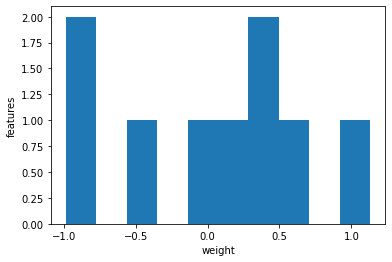

In [80]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print("linear regression intercept: ",lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df
plt.hist(coeff_df)
plt.xlabel("weight")
plt.ylabel("features")

#### Testing out data:

In [61]:
from sklearn.metrics import mean_squared_error
#y_test = y_test.to_numpy().reshape(-1,1)
#X_test = X_test.to_numpy().reshape(-1,1)
y_pred = lm.predict(X_test)
print("Coefficients: ",lm.coef_)
print("Error rate: ",np.sqrt(mean_squared_error(y_pred,y_test))*100)

Coefficients:  [ 0.0757235  -0.04363572 -0.00060708 -0.01452081  0.00183995  0.01188135
 -0.07156022  0.01614652 -0.03128799]
Error rate:  17.171502610124595


### meaning of the coeffiecients:
 

#### Tempo

test both models with a sample music data 

In [29]:
file_path = r"‪C:\Users\abelf\Downloads\songsdata.csv".strip("\u202a")
test_df = pd.read_csv(file_path)
test_df.columns

Index(['track_id', 'tempo', 'loudness', 'mode', 'artist_name', 'title'], dtype='object')

let's use spotify api to get some audio features by using the features given 

In [87]:
tempo = 129.991
loudness = -6.105
speechiness = 0.0638
acousticness = 0.0436
instrumentalness = 0
energy = 0.815
valence = 0.28
danceability = 0.512
liveness = 0.149

In [99]:
print("Predicted HR using linear regression:",lm.predict([[tempo,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence]]))
print("Predicted HR using random forest:",forest.predict([[tempo,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence]]))

Predicted HR using linear regression: [79.89503691]
Predicted HR using random forest: [79.79096355]


# Product Demo With Pictures

## WEB FRONT PAGE
- FIRST CARD:ALLOWS TO CONNECT TO PULSOID TO GET HR DATA
- SECOND CARD: ALLOWS YOU TO GENERATE A RANDOM PLAYLIST AND/ ALSO A PLAYIST BASED ON THE YOUR FAVORITE ARTIST 
- THIRD CARD: ALLOWS YOU TO SEACH YOUR FAVORITE ARTIST, WHICH THEN PROCEEDS TO GET THE TOP 10 SONGS AND PREDICT THE HEART RATE OF EACH SONG
    -IT COLLECTS THE FEATURES OF EACH SONG USING SPOTIFY API: https://spotipy.readthedocs.io/en/2.19.0/
            - THE APP HAS THE FOLLOWINGS API ENDPOINTS
                GET_ARTIST_ENDPOINT = 'https://api.spotify.com/v1/artists/{id}'
                SEARCH_ENDPOINT = 'https://api.spotify.com/v1/search'
                RELATED_ARTISTS_ENDPOINT = 'https://api.spotify.com/v1/artists/{id}/related-artists'
                TOP_TRACKS_ENDPOINT = 'https://api.spotify.com/v1/artists/{id}/top-tracks'
                SEARCH_FEATURES_ENDPOINT = 'https://api.spotify.com/v1/audio-features/{}'
 - FOURTH CARD: WILL UPDATE ONCE THE MODEL(LINEAR REGRESSION) HAS RUN.

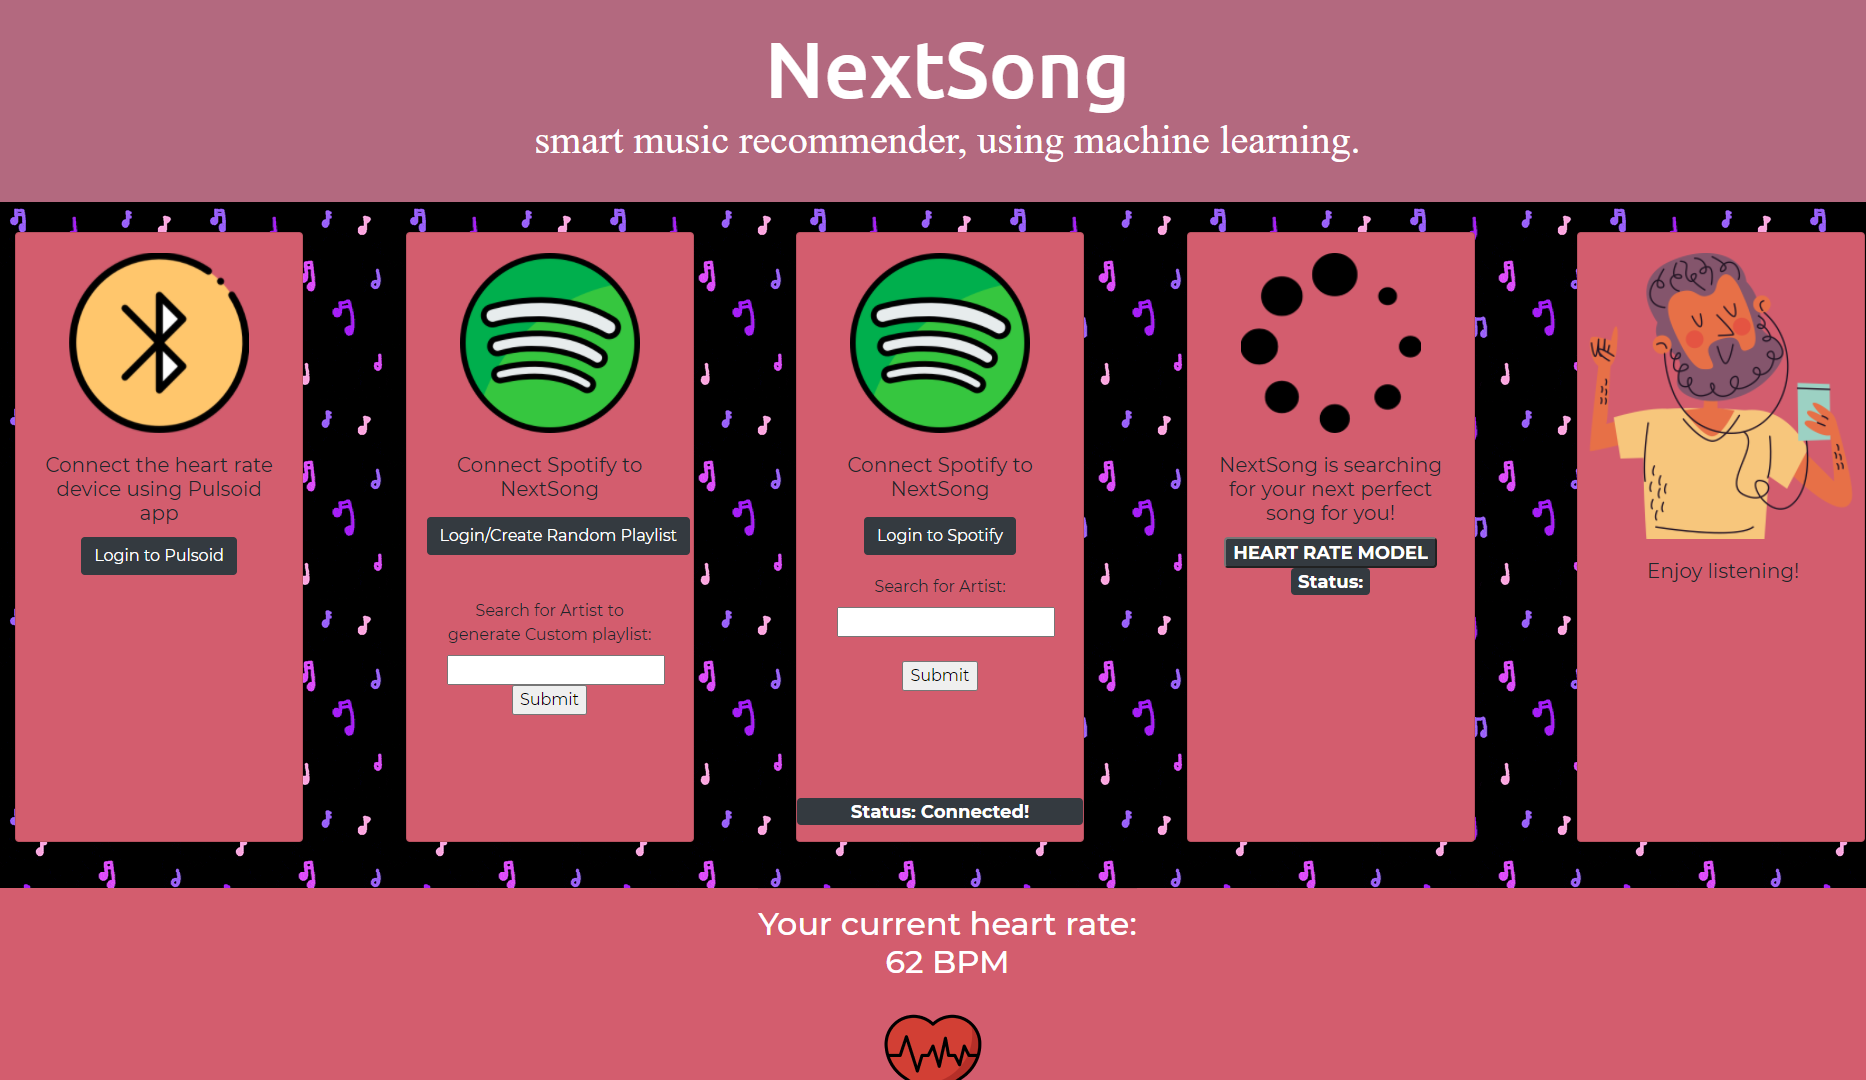

## SEARCH FOR YOUR FAVORITE ARTIST

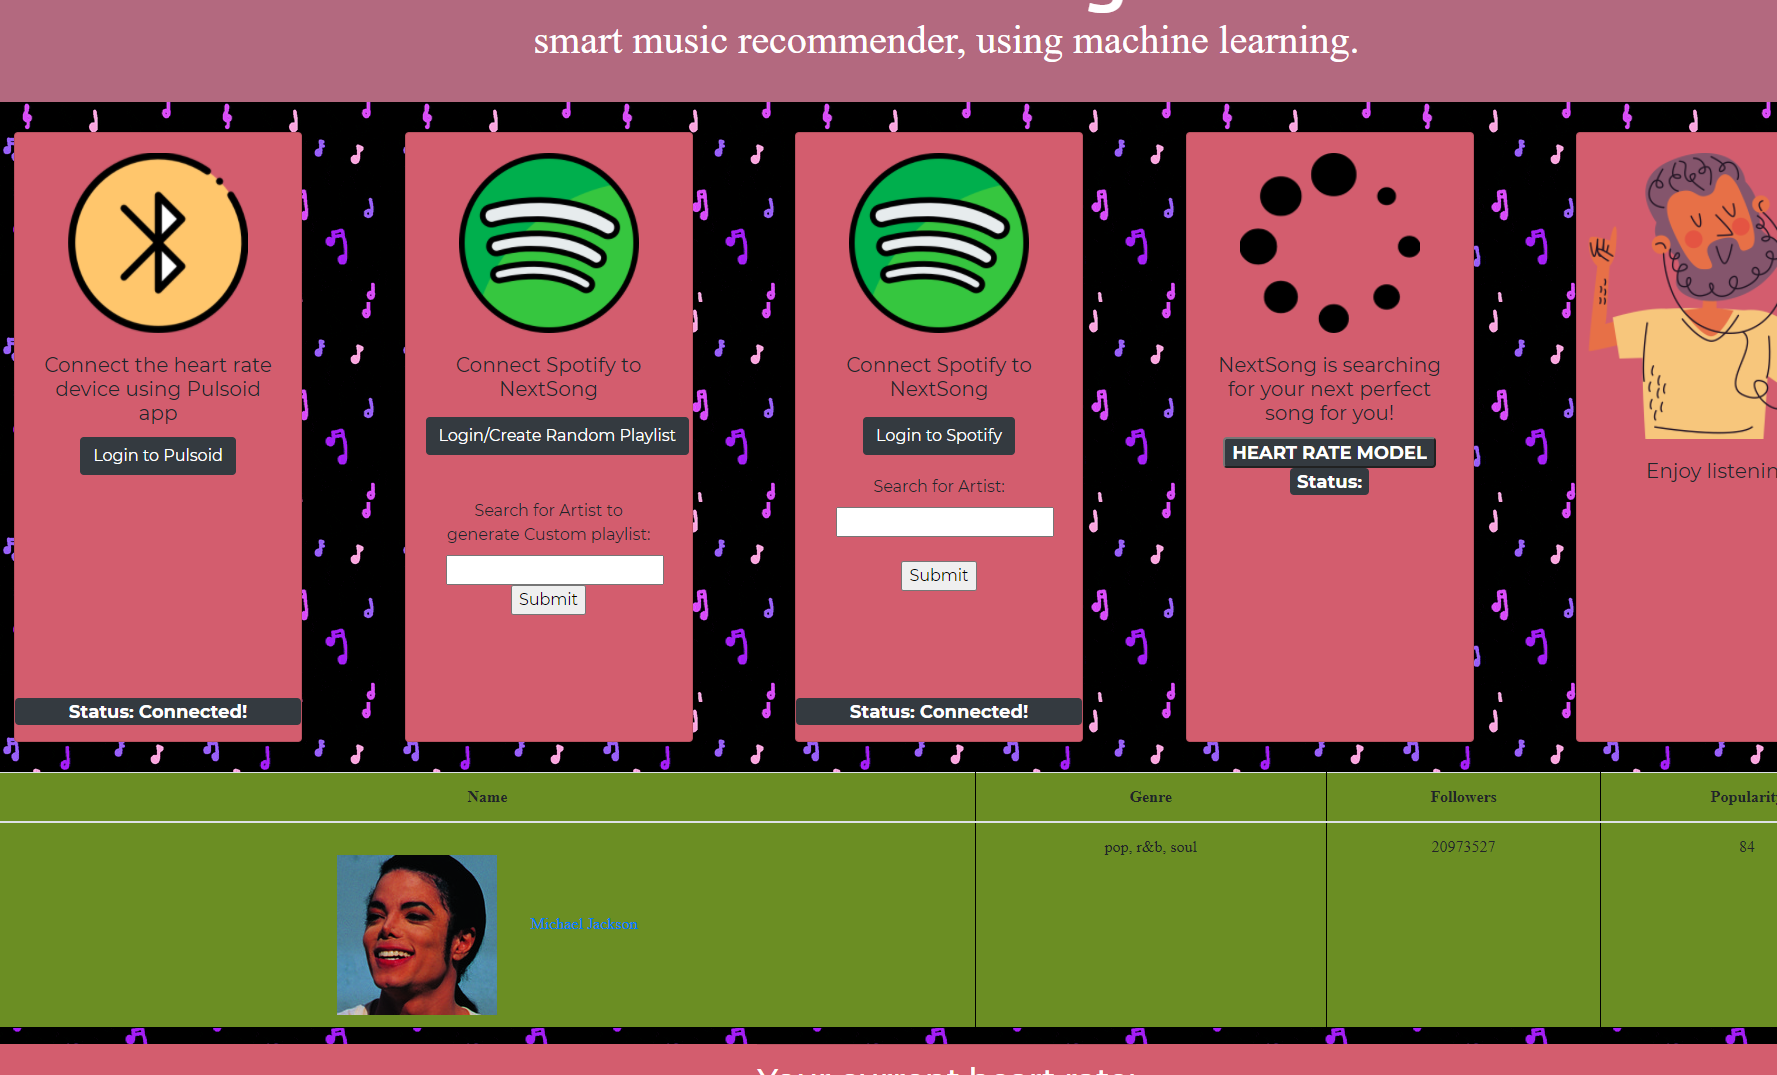

## CLICK ON ARTSIT NAME
 - TOP PAGE CONTAINS THE FIVE CARD:
 - THE HEART RATE MODEL CARD IS UPDATED WITH THE CURRENT 1O TEN SONGS OF THE ARTIST

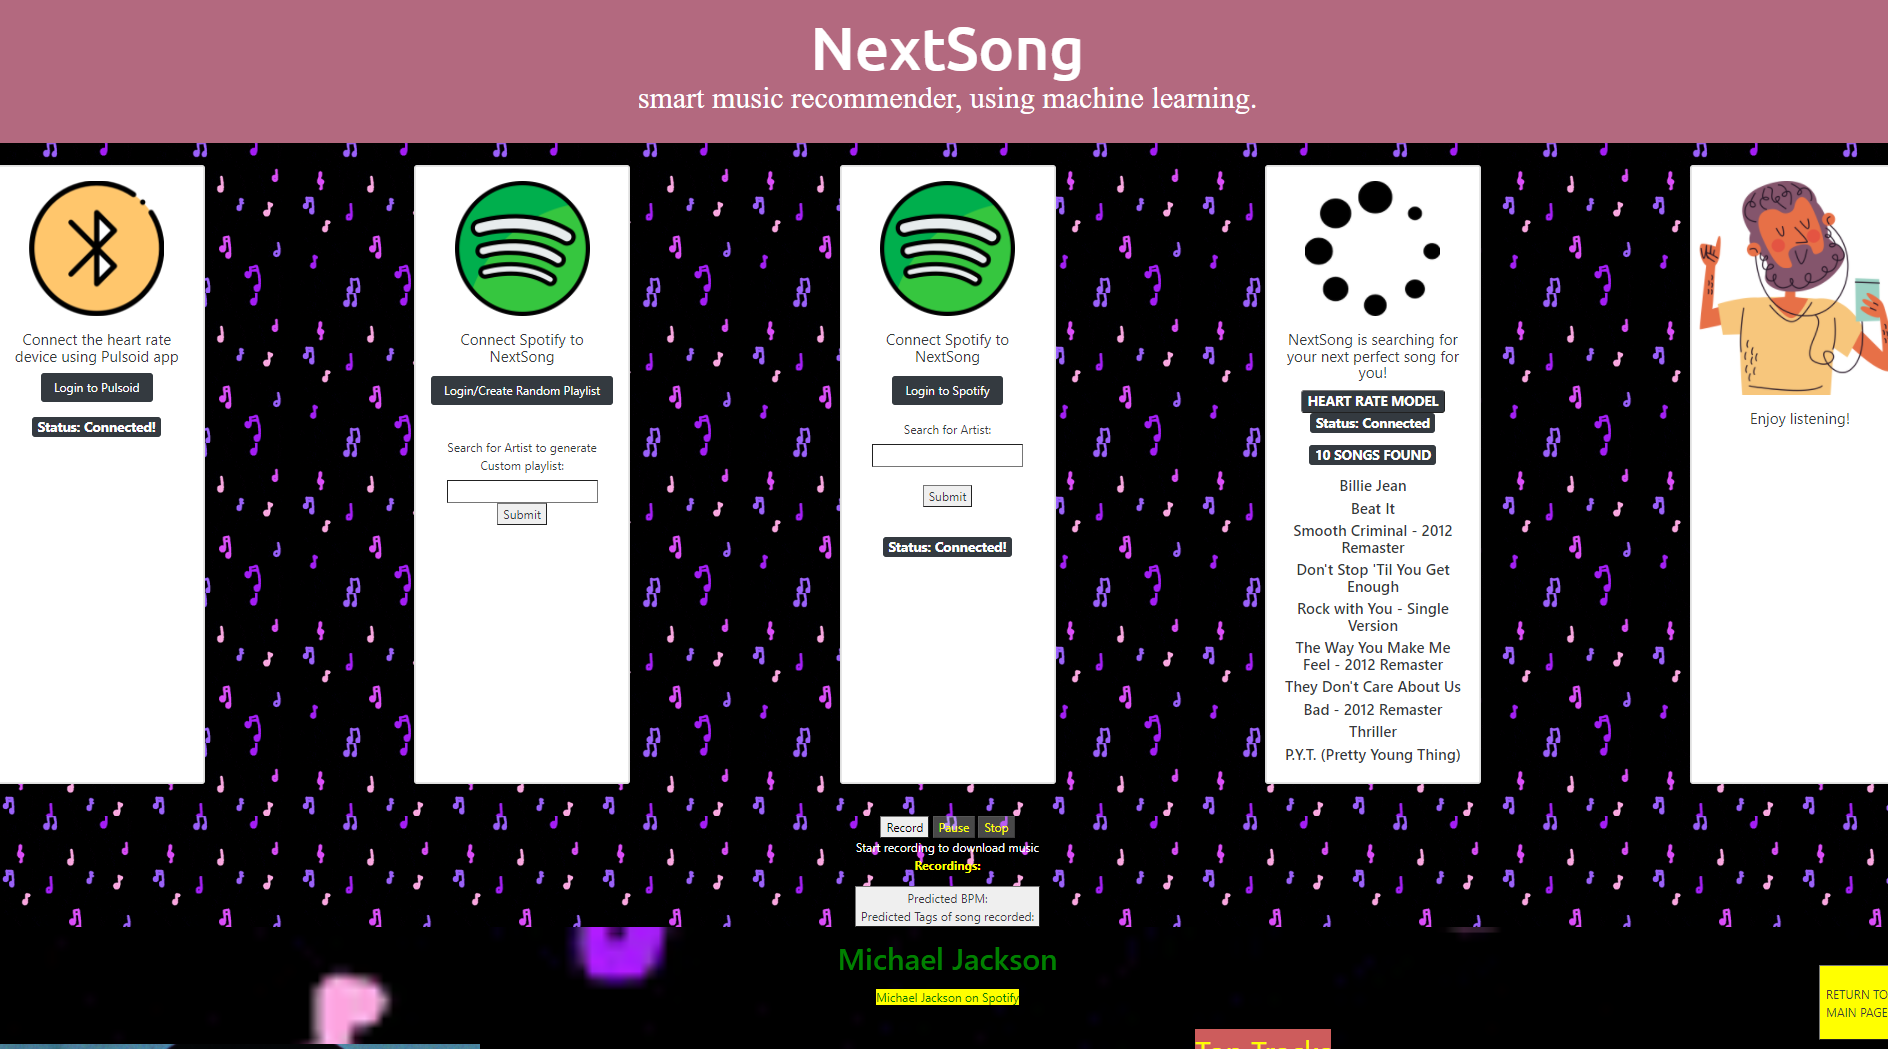

## BOTTOM PAGE`
- HAVE ARTIST PROFILE 
- TABLE WITH TRACK SONG, TITLE, ALBUM, POPULARITY AND PREDICTED HR USING LINEAR REGRESSION MODEL
- HAVE RECOMMENDED ARTIST SECTIONS BASED ON GENRE AND SIMILAR FEATURES(TEMPO, LOUDNESS ETC...) 

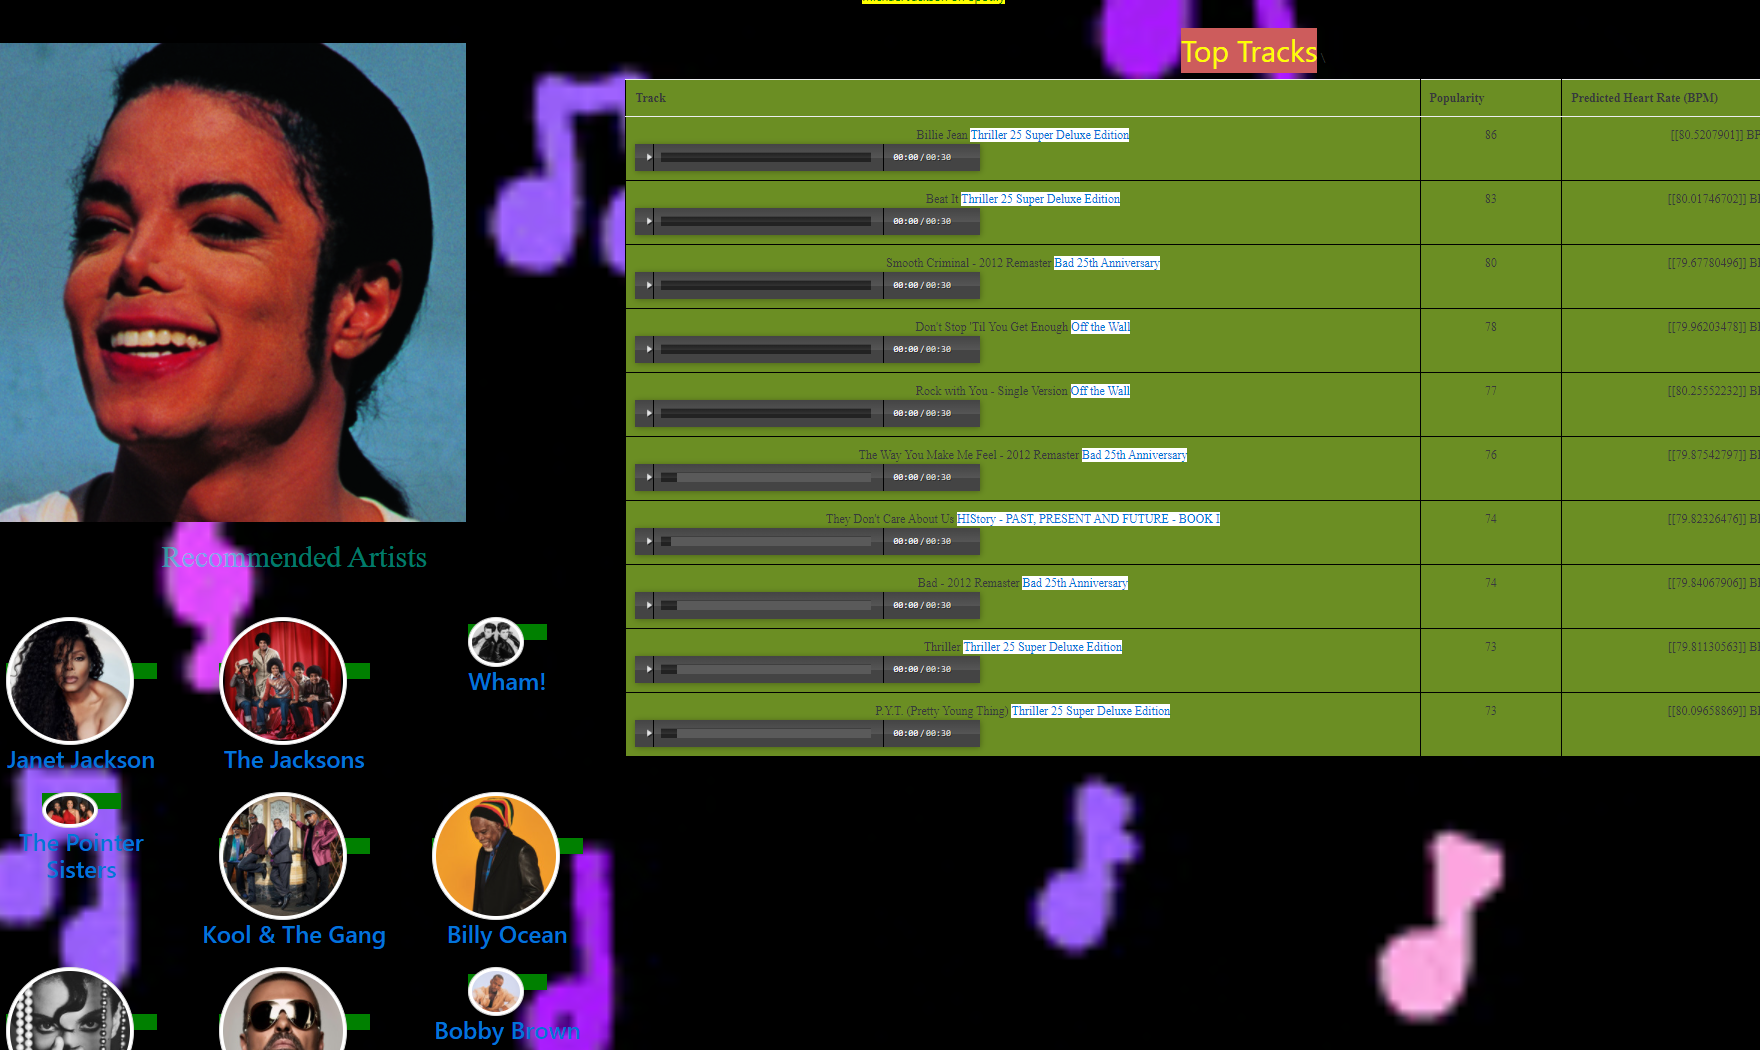

## WHERE DOES THE PRETRAINED MODEL COMES IN?
 - WE CAN RECORD THE AUDIO AND DOWNLOAD TO OUR PC 
 - RUN THE TEMPOCNN AND MUSICNN TO GET THE PREDICTED BEAT AND MUSIC TAGS

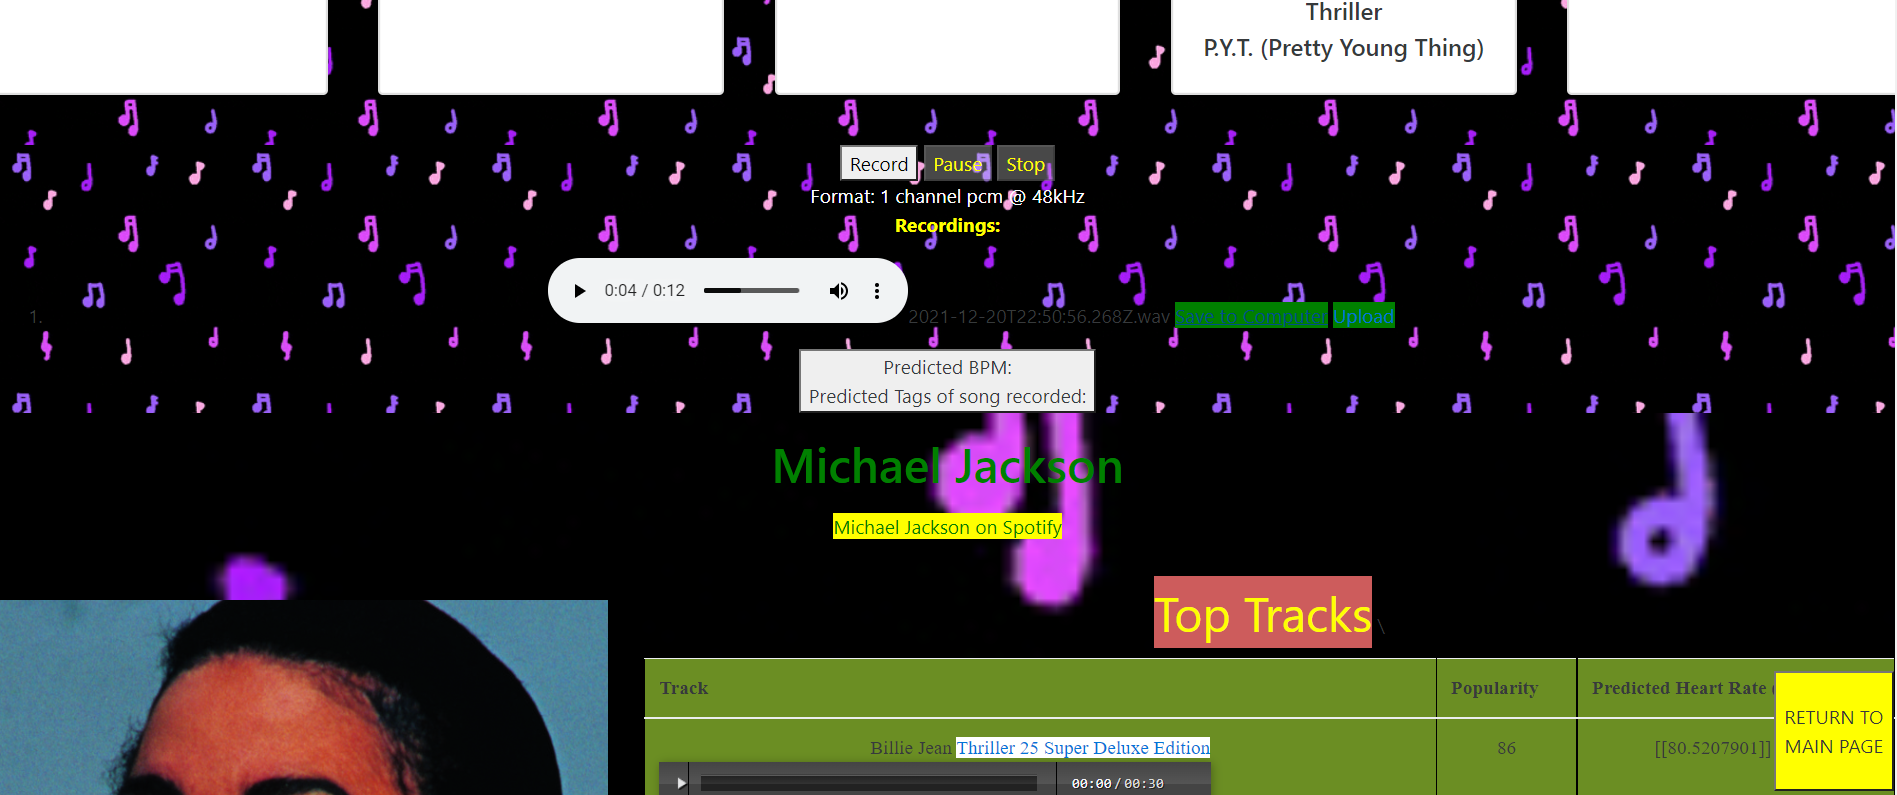

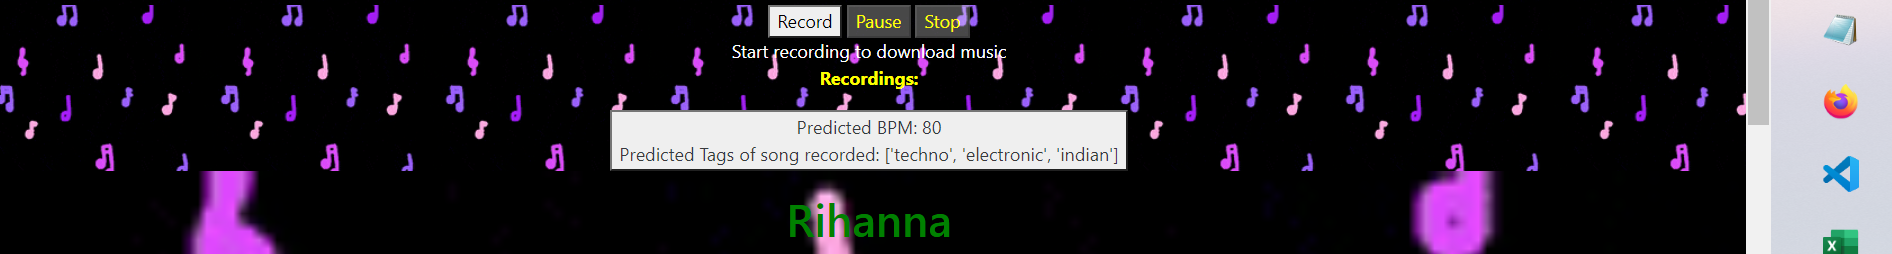


# Impact

Our work developing NextSong was an exciting process altogether. <br>
Music has is a universal language where all users across the globe can relate to, integrating both health + entertainment aspects together in NextSong, enhances the impact for our users. <br>
Technology speaking, deriving the music suggestion based on user's heart rate by using NextSong ML model, puts NextSong in the forefront of music recommendation system based on heart rate research area.  


### Caveats & Conclusions

1. More data to aggregate : while building the dataset, the heart rate input was taken from our team members only, the distribution of age group is very limited. All team members age is in their mid 20's on average. This of course, has a huge impact on the bias of our recommnedation system.

2. We linear regression model results were encouraging, ~ %70 score is quite promising for the heart rate prediction. 
Considering the many variables using Spotify + the musicnn transfer model component.



### Improvments & Future Suggestions

1. Recording heart rate across different age groups in order to make NextSong perform well for all age groups.  
2. More code adjustment for an easier setup of NextSong
3. Moving NextSong to the cloud!
